References
* https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

Count Vectorizer
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [1]:
import pandas as pd

In [11]:
datafilepath = "D:\Victoria\EMSE\p2\EMSE_DevInt\python\data\data_processed\processed_data.csv"

In [12]:
data = pd.read_csv(datafilepath)

In [13]:
data.head()

,Unnamed: 0,Unnamed: 0.1,dir,title,text,processed_title_and_text
0,0,0,1000137,DTE.ExecuteCommand and wait,I would like use macros for publishing my weba...,dte executecommand wait would like use macro p...
1,1,1,10005544,Interview question: data structure to set all ...,I encountered the following interview question...,interview question data structur set valu enco...
2,2,2,10007328,100% height -dynamic height footer at the bottom,I have the following webpage.\n\n\n\nand the s...,height dynam height footer bottom follow webpa...
3,3,3,10010324,Login failed for user &quot;xxx&quot; Failed t...,Im using entity framework code first. When sta...,login fail user quot xxx quot fail open explic...
4,4,4,10011261,How to lowercase the text in the EditText of t...,I'm using a searchable item with suggestion in...,lowercas text edittext searchabl item use sear...


In [14]:
processed_data = data['processed_title_and_text']

## Visualize Word Cloud

In [15]:
from wordcloud import WordCloud

In [16]:
long_string = ' '.join(list(processed_data.values))

In [17]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

In [18]:
wordcloud.generate(long_string)

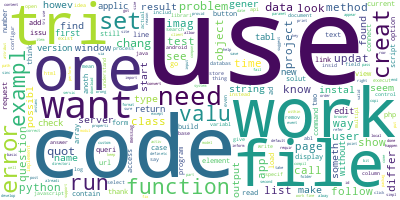

In [19]:
wordcloud.to_image()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [21]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words

d:\victoria\emse\p2\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


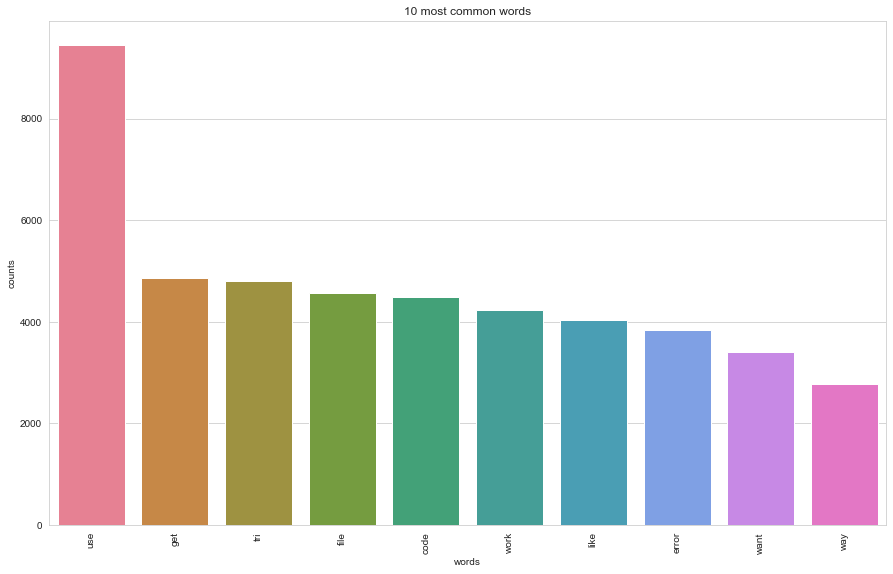

In [22]:
count_vectorizer = CountVectorizer()# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(processed_data)# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [23]:
words = count_vectorizer.get_feature_names()
len(words)

16914

## LDA

In [24]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

        
# Number of topics
number_topics = 5
# Number of words per topic
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
use class object code method test get like error creat

Topic #1:
file error use run tri get instal work command code

Topic #2:
use user get app work request http api tri page

Topic #3:
use imag work code button want tri text click html

Topic #4:
use like valu data string get want way would array
